# Review: Collective Adaptation intersections with Resilience, Adaptation and Transformation of SES 

This notebook provides the relevant code to run the literature mapping analysis undertaken in [name of paper]. The notebook includes code to download relevant papers for Scopus, [insert archives used], undertake preliminary screening and data cleaning, as well as as more advanced ML analysis of themes clustering. 

Codes is broken down into sections and extensively commented for easy understanding. 



## Note book module set up


In [1]:
# Adapted from example code by: 

# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy


## Importing CSV files from queries of databases 

### Scopus 
Title: 
"collective intelligence" OR "collective adaptation" OR resilience OR adaptation OR transformation

Title, Abstract, Keywords: 
"collective intelligence" OR "collective adaptation" AND resilience OR adaptation OR transformation

### SpringerLink 
Title: 
'"collective intelligence" OR "collective adaptation" AND (resilience OR adaptation OR transformation)'

In [2]:


# Load the CSV files
docs_scopus = litstudy.load_scopus_csv('../data/scopus/scopus_results.csv')
print(len(docs_scopus), 'papers loaded from IEEE')

docs_springer = litstudy.load_springer_csv('../data/springer/springer_results.csv')
print(len(docs_springer), 'papers loaded from Springer')

# Merge the two document sets
docs_csv = docs_scopus | docs_springer
print(len(docs_csv), 'papers loaded from CSV')


162 papers loaded from IEEE
1000 papers loaded from Springer
1154 papers loaded from CSV


In [3]:
# Exclude documents if needed 
#docs_exclude = litstudy.load_ris_file('data/exclude.ris')
docs_remaining = docs_csv #- docs_exclude

#print(len(docs_exclude), 'papers were excluded')
print(len(docs_remaining), 'paper remaining')

1154 paper remaining


In [4]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

# To run refine_scopus you will need to be able to access scopus using an elsevier
# APIkey, which can be obtained at this link: https://dev.elsevier.com/ 
# litstudy uses pybliometrics to access scopus API, details on how to score API key
# here:https://pybliometrics.readthedocs.io/en/stable/configuration.html
	

docs_scopus, docs_notfound = litstudy.refine_scopus(docs_remaining)

print(len(docs_scopus), 'papers found on Scopus')
print(len(docs_notfound), 'papers were not found and were discarded')
docs_scopus = docs_remaining

  0%|          | 0/1154 [00:00<?, ?it/s]

 14%|█▍        | 165/1154 [01:42<08:10,  2.02it/s]c:\Users\rosst\miniconda3\envs\CIres_litrev_book\Lib\site-packages\litstudy\sources\scopus.py:230: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"no document found for DOI {doi}: {e}")
 24%|██▎       | 274/1154 [02:42<08:09,  1.80it/s]

In [ ]:
import pybliometrics

pybliometrics.scopus.utils.constants.CONFIG_FILE

WindowsPath('C:/Users/rosst/.config/pybliometrics.cfg')

In [ ]:
from pybliometrics.scopus.utils import config

print(config['Authentication']['APIKey'])  # Show keys
#config['Proxy']['https'] = 'https://virtual.anu.edu.au/login/?url'  # Redefine proxy

#0eeb8d1f281aee170a3ee3ac3040b5d1
b6b3b0e42389c8ff8f9634ef2065e711


<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

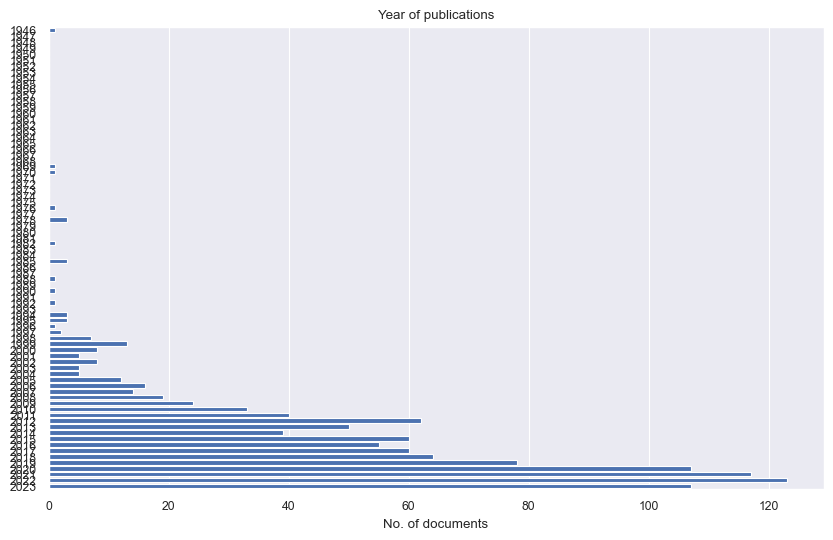

In [ ]:
# Initial document numbers
litstudy.plot_year_histogram(docs_scopus)


1111 papers remaining


<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

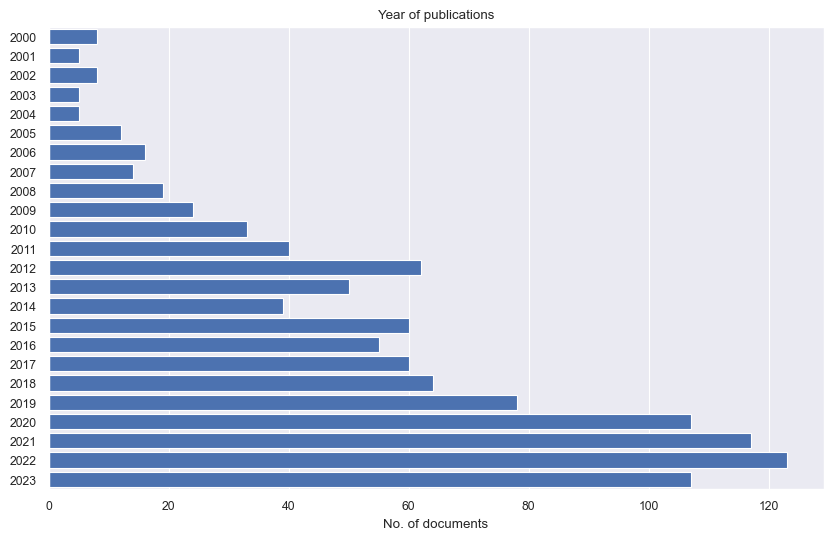

In [ ]:
# Trip docs to suitabl year range. 
docs = docs_scopus.filter_docs(lambda d: d.publication_year >= 2000)
print(len(docs), 'papers remaining')

# Plot publications per year
litstudy.plot_year_histogram(docs)

<Axes: title={'center': 'Affiliations'}, xlabel='No. of documents'>

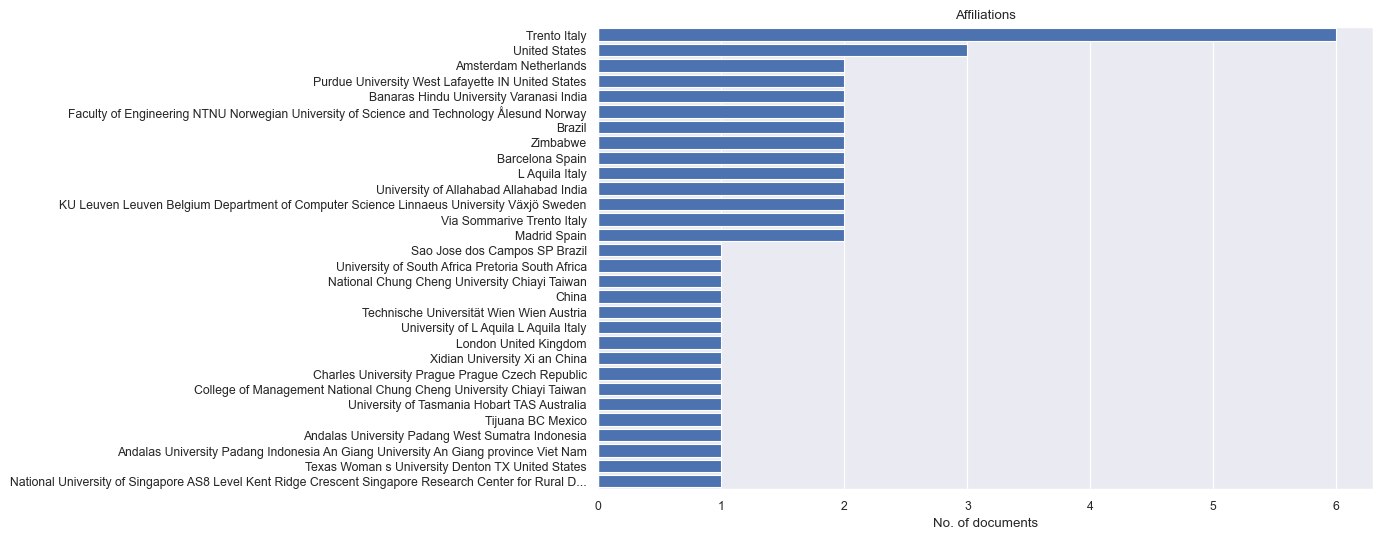

In [ ]:
# Plot affilliations 
litstudy.plot_affiliation_histogram(docs, limit=30)

<Axes: title={'center': 'Authors'}, xlabel='No. of documents'>

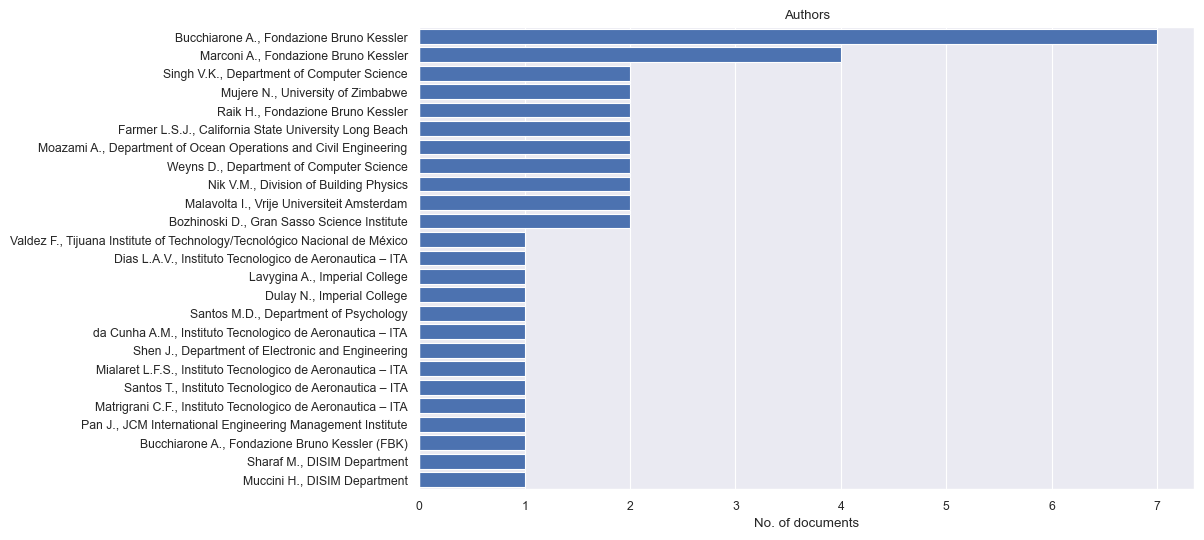

In [ ]:
# Authors 
litstudy.plot_author_histogram(docs)

<Axes: title={'center': 'Publication source'}, xlabel='No. of documents'>

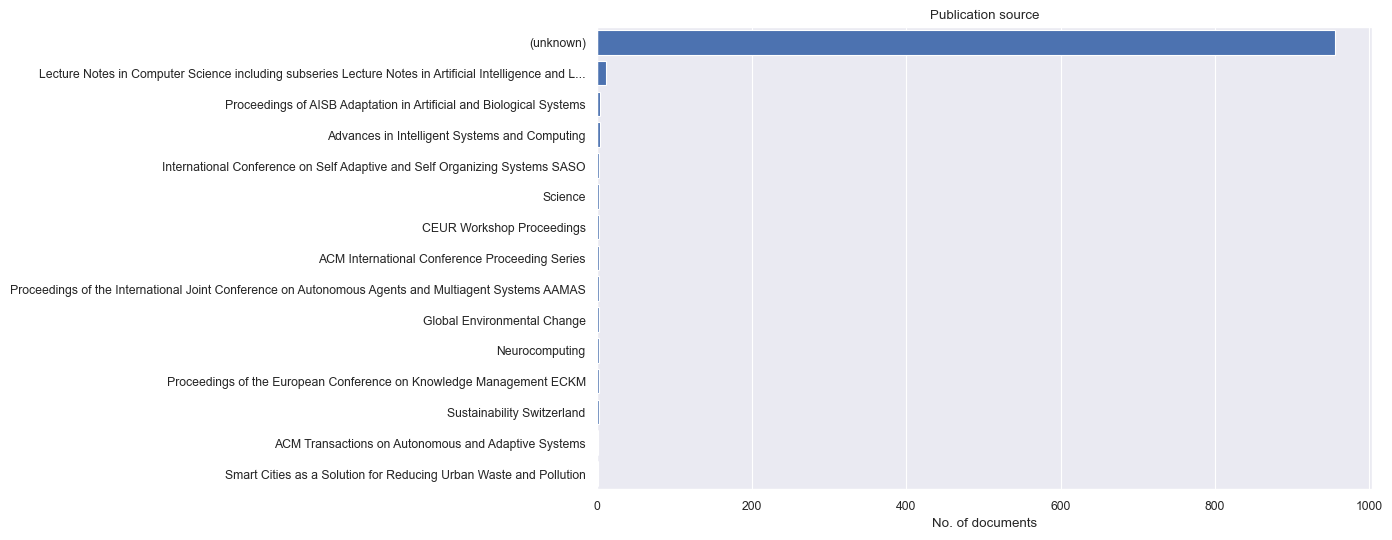

In [ ]:
# Source histogram 
# looks like it requires refined scopus literature data 
mapping = {
    "IEEE International parallel and distributed processing symposium IPDPS": "IEEE IPDPS",
    "IEEE International parallel and distributed processing symposium workshops IPDPSW": "IEEE IPDPS Workshops",
}

litstudy.plot_source_histogram(docs, mapper=mapping, limit=15)

## Network analysis

*text copied from litstudy doc*
        
    The network below shows an example of a co-citation network. This is a type of network where nodes represent documents and edges represent pairs of documents that have been cited together simulatenously by other papers. The strength of the edges indicates how often two documents have been cited together. Two papers with a high co-citation strength (i.e., stronger edge) are usually highly related.

In [ ]:
# Co-citation network

litstudy.plot_cocitation_network(docs, max_edges=500)

no edges given


## Topic Modelling 

*text from litstudy*

litstudy supports automatic topic discovery based on the words used in documents abstracts. We show an example below. First, we need to build a corpus from the document set. Note that `build_corpus` supports many arguments to tweak the preprocessing stage of building the corpus. In this example, we pass `ngram_threshold=0.85`. This argument adds commonly used n-grams (i.e., frequent consecutive words) to the corpus. For instance, `artificial` and `intelligence` is a bigram, so a token `artificial_intelligence` is added to the corpus.

In [ ]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.75)

We can compute a word distribution using `litstudy.compute_word_distribution` which shows how often each word occurs across all documents. In this example, we focus only on n-grams by selecting tokens that contain a _. We see that words such as `artificial intelligence` and `trade offs` indeed have been recognized as common bigrams.

In [ ]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
ant_colony,10
bee_colony,7
berlin_heidelberg,5
big_data,15
bio_inspired,6
climate_change,41
collective_intelligence,131
covid_pandemic,8
cyber_physical,8
decision_making,24


<Axes: title={'center': 'Top words'}, ylabel='% of documents'>

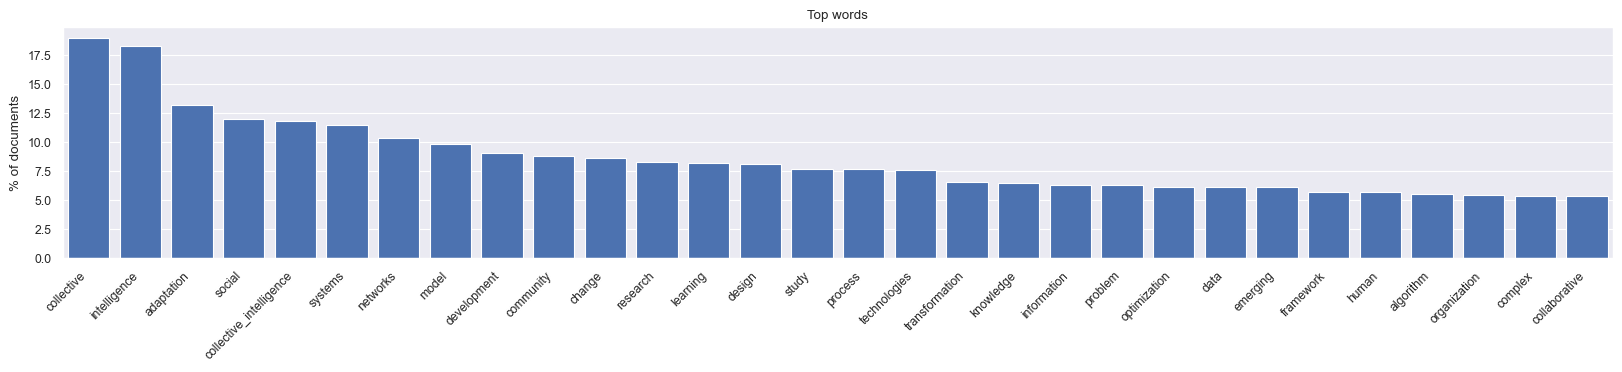

In [ ]:
# visualizing the word distribution of the corpus

plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=30, title="Top words", vertical=True, label_rotation=45)

## Topic Modelling 

The section below involves developing topic models. Litstudy offer two topic models LDA and NMF both are explored below. 

Topic modeling is a technique from natural language processing for discovering abstract "topics" in a set of document. We need to manually select the number of desired topics. Here we choose 15 topics. It is recommended to experiment with more or less topics to obtain topics that are more fine-grained or more coarse-grained

# NMF


In [ ]:
# NMF
 
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)



In [ ]:
# Show top words (tokens) for each topic

for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['web', 'users', 'information', 'networks', 'semantic']
Topic 2: ['optimization', 'algorithm', 'swarm', 'metaheuristic', 'particle']
Topic 3: ['systems', 'complex', 'adaptation', 'research', 'design']
Topic 4: ['technologies', 'education', 'higher', 'research', 'practice']
Topic 5: ['intelligence', 'collective', 'collective_intelligence', 'human', 'machine']
Topic 6: ['adaptation', 'climate', 'climate_change', 'change', 'vulnerability']
Topic 7: ['agents', 'multi', 'behavior', 'cognitive', 'adaptation']
Topic 8: ['computing', 'abstracts', 'science', 'cloud', 'problem']
Topic 9: ['evolution', 'control', 'data', 'networks', 'big']
Topic 10: ['learning', 'crowdsourcing', 'online', 'artificial', 'management']
Topic 11: ['robot', 'multi', 'swarm', 'self', 'cooperative']
Topic 12: ['social', 'media', 'networks', 'postdigital', 'detection']
Topic 13: ['decision', 'making', 'decision_making', 'business', 'networks']
Topic 14: ['cities', 'smart', 'sustainable', 'future', 'data']
Topic 

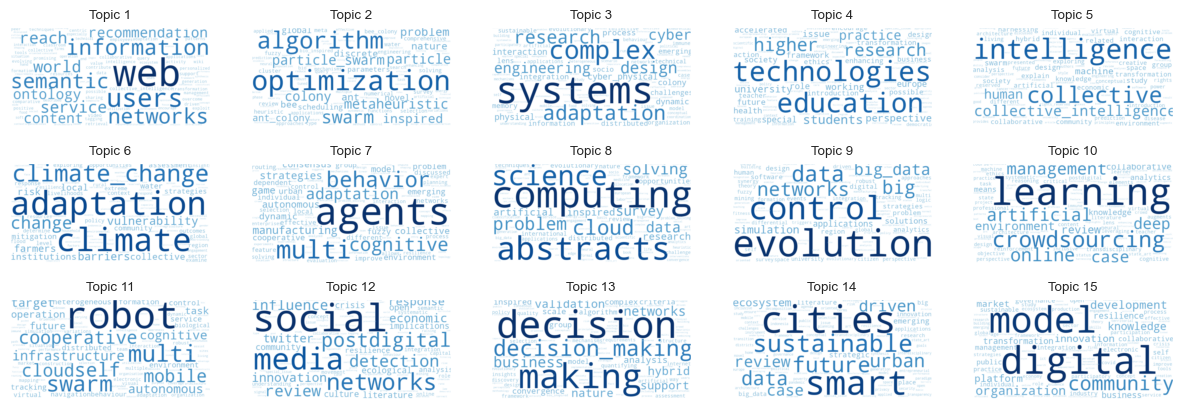

In [ ]:
# as word clouds 
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

TypeError: TSNE.__init__() got an unexpected keyword argument 'square_distances'

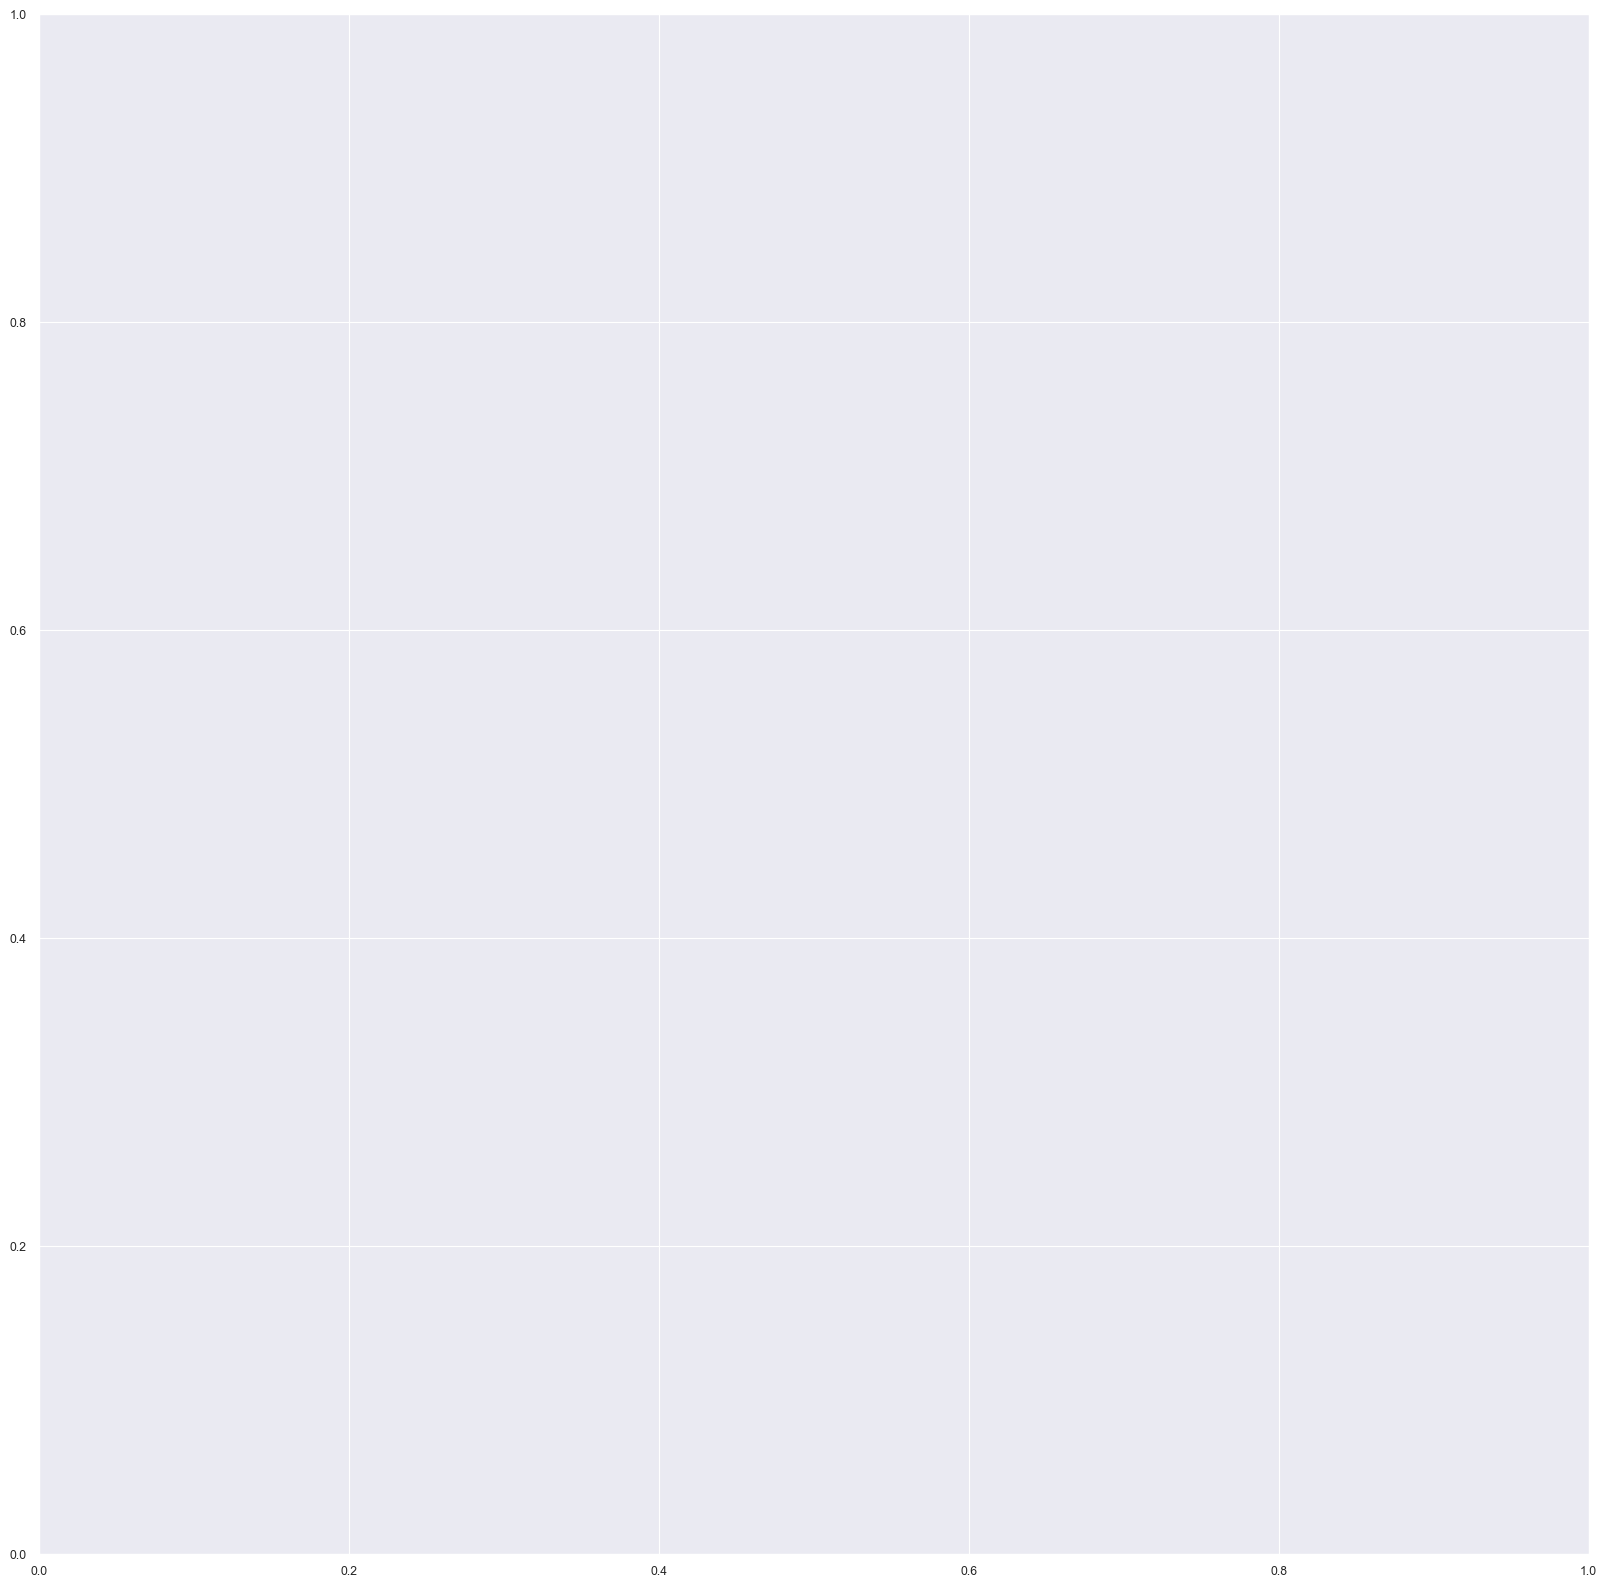

In [ ]:
# visualized as landscape plots
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

## Advanced Topic Modelling 

This section combines result of topic modelling with plotting of statistics 



In [ ]:
# Identifying topics with tokens 
topic_id = topic_model.best_topic_for_token("collective_intelligence")

# print top 10 papers most related to topic 
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

Ambient Intelligence, Criminal Liability and Democracy
Mandevillian intelligence
Using prediction polling to harness collective intelligence for disease forecasting
Is cancer an intelligent species?
Harnessing the power of collective intelligence in dentistry: a pilot study in Victoria, Australia
Variations of cohort intelligence
Hybrid collective intelligence in a human–AI society
Collective intelligence in fingerprint analysis
Human-machine co-intelligence through symbiosis in the SMV space
g versus c: comparing individual and collective intelligence across two meta-analyses


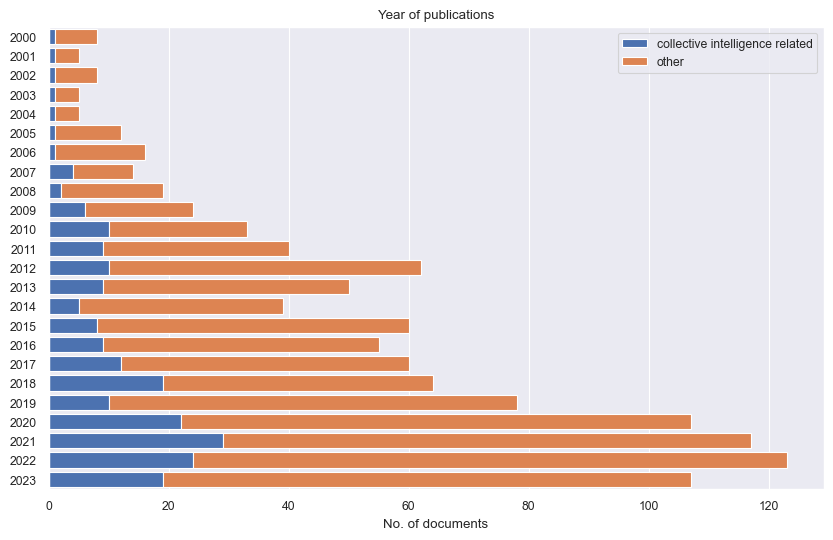

In [ ]:
# we can tag documents that are very related to the above topic 
# this will be a good place to identify if CI / CA is close to SES adaptation

threshold = 0.2
ci_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('ci_topic', ci_topic)


groups = {
    'collective intelligence related': 'ci_topic',
    'other': 'not ci_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

In [ ]:
# dtermine statistic of increase in collective intelligence over time
table = litstudy.compute_year_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100



,collective intelligence related,other
2000,12.500000,87.500000
2001,20.000000,80.000000
2002,12.500000,87.500000
2003,20.000000,80.000000
2004,20.000000,80.000000
2005,8.333333,91.666667
2006,6.250000,93.750000
2007,28.571429,71.428571
2008,10.526316,89.473684
2009,25.000000,75.000000


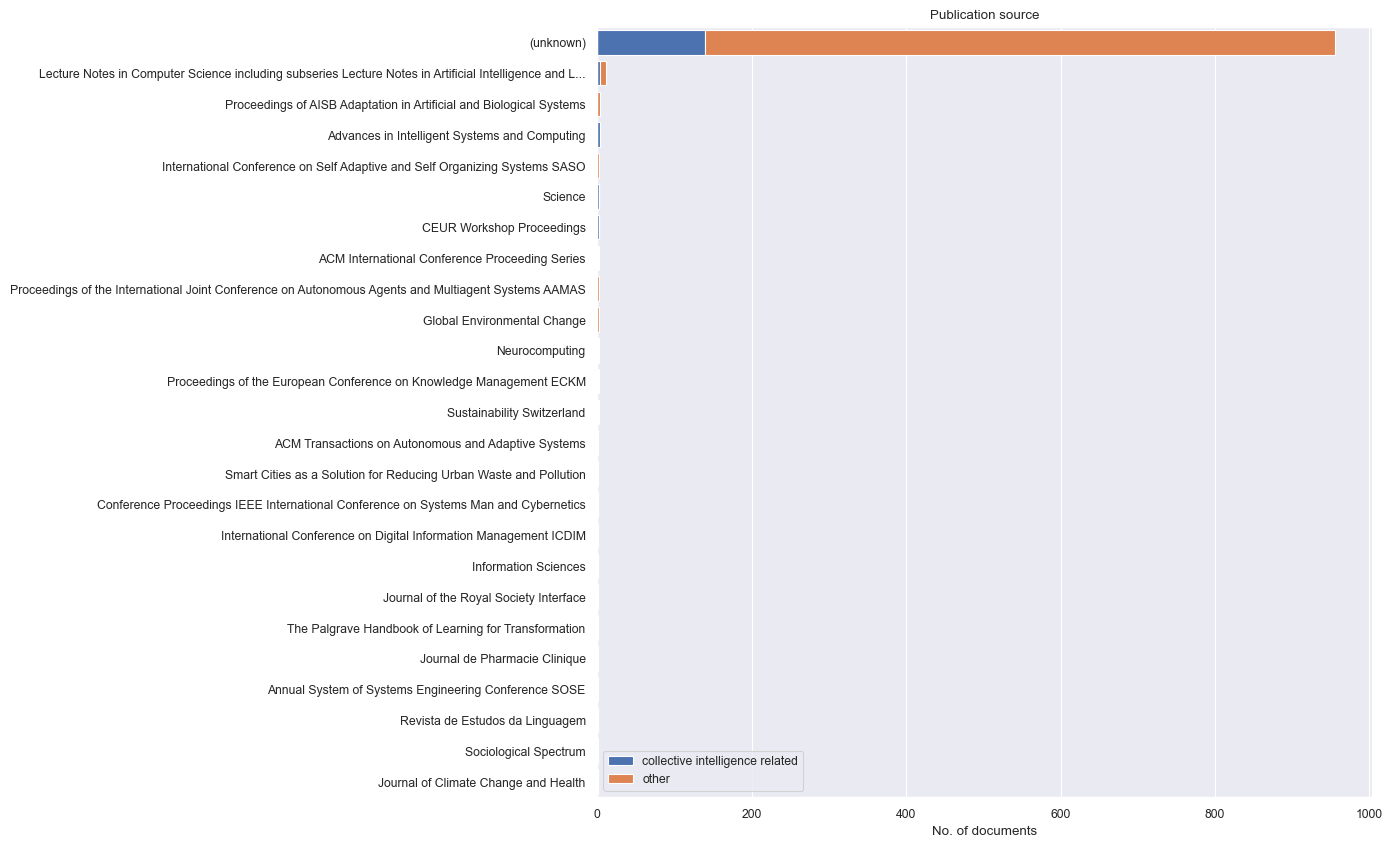

In [ ]:
# Investigating how collective intelligence relates to journals or conferences
# likely requires the scopus API to improve abstract data

plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);

In [ ]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['collective intelligence related'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['collective intelligence related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,collective intelligence related,other,total,ratio
Lecture Notes in Computer Science including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics,3,8,11,27.272727
(unknown),140,816,956,14.644351


In [ ]:
# TOD 